# Example Models Run File #

This contains the code to run models on an example dataset to show how to use the code. This can aid modification to GPU-enabled computing resources for running the full dataset. You can cre shell scripts to configure running each of the models with all data combinations

In [1]:
from dataset_creation.datasets import *
from models.run.run_randomforest_models import *
from models.run.run_snn_models import *
from models.run.run_svm_models import *
from models.run.run_syndeep_models import *
from models.run.run_xgboost_models import *
from models.src.modelPCNNGL import *
from models.src.modelPCNNGLSyndeep import *

Get the example data slice that can be run on a local computer without more advanced computing resources

In [2]:
example_data_fn = 'example_data/all_cancer_256_mfp_bc0_comboscore.csv'

mfp_bc_bal_dataset = MorganFingerprintDataset(example_data_fn, balance_classes=True)
bal_train, bal_val, bal_test = split_data(mfp_bc_bal_dataset, train_size=0.8, tune_size=0.1, test_size=0.1, random_state=42)

# To access the actual training/validation/test data, you can use the indices from the split_data function
print("Training data shape: ")
X_train = mfp_bc_bal_dataset.x[bal_train.indices].detach().cpu().numpy().astype(np.float32)
print(X_train.shape)
y_train = mfp_bc_bal_dataset.y[bal_train.indices].detach().cpu().numpy().astype(np.float32).flatten()
print(y_train.shape)

print('Tuning data shape: ')
X_tune = mfp_bc_bal_dataset.x[bal_val.indices].detach().cpu().numpy().astype(np.float32)
print(X_tune.shape)
y_tune = mfp_bc_bal_dataset.y[bal_val.indices].detach().cpu().numpy().astype(np.float32).flatten()
print(y_tune.shape)

print('Test data shape: ')
X_test = mfp_bc_bal_dataset.x[bal_test.indices].detach().cpu().numpy().astype(np.float32)
print(X_test.shape)
y_test = mfp_bc_bal_dataset.y[bal_test.indices].detach().cpu().numpy().astype(np.float32).flatten()
print(y_test.shape)

Original Dataset shape: (300928, 513)
Initial dataset size: 300928
Balancing classes
Balanced dataset size: 185604
Train size: 148483
Tune size: 18560
Test size: 18561
Training data shape: 
(148483, 512)
(148483,)
Tuning data shape: 
(18560, 512)
(18560,)
Test data shape: 
(18561, 512)
(18561,)


Run an example SVM

In [3]:
# Metrics include: 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 Score', 'MCC', 'AUC', 'Kappa'

# Train model
model_svm_one = fit_svm_bc_model(X_train, y_train)
one_svm_metrics = evaluate_svm_bc_model(model_svm_one, X_tune, y_tune)
print(one_svm_metrics)

# Tune a different model
model_svm_two = SVMModelBC(C=10.0)
model_svm_two.fit(X_train, y_train)
other_svm_metrics = evaluate_svm_bc_model(model_svm_two, X_tune, y_tune)
print(other_svm_metrics)

# Test the best model
best_svm_model = model_svm_two
best_svm_metrics = evaluate_svm_bc_model(best_svm_model, X_test, y_test)
print(best_svm_metrics)

Model trained
[0.6264008620689655, 0.6028713298791019, 0.6498493975903614, 0.6317873303167421, 0.6169907202828104, 0.2530048979327123, 0.6263603637347316, 0.25274063723996454]
[0.6264008620689655, 0.6028713298791019, 0.6498493975903614, 0.6317873303167421, 0.6169907202828104, 0.2530048979327123, 0.6263603637347316, 0.25274063723996454]
[0.6314314961478369, 0.6, 0.6625562942311817, 0.6377762430939227, 0.6183116665736763, 0.26308986303533816, 0.6312781471155908, 0.2626321894410606]


Run an example Random Forest model

In [4]:
# Metrics include: 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 Score', 'MCC', 'AUC', 'Kappa'

# Train model
model_rf_one = RandomForestModelBC(n_estimators=50, max_depth=1)
model_rf_one.fit(X_train, y_train)
one_rf_metrics = evaluate_random_forest_bc_model(model_rf_one, X_tune, y_tune)
print(one_rf_metrics)

# Tune a different model
model_rf_two = RandomForestModelBC(n_estimators=128, max_depth=5)
model_rf_two.fit(X_train, y_train)
other_rf_metrics = evaluate_random_forest_bc_model(model_rf_two, X_tune, y_tune)
print(other_rf_metrics)

# Test the best model
best_rf_model = model_rf_two
best_rf_metrics = evaluate_random_forest_bc_model(best_rf_model, X_test, y_test)
print(best_rf_metrics)

Number of parameters: 750
[0.5755387931034482, 0.5387521588946459, 0.6121987951807228, 0.5806188925081434, 0.5589025755879059, 0.15136244352744663, 0.5754754770376843, 0.1509696907083169]
Number of parameters: 40160
[0.6033943965517241, 0.5164075993091537, 0.6900817555938038, 0.6241356816699283, 0.565184003780495, 0.2096888323396327, 0.6032446774514787, 0.20655071704221595]
Number of parameters: 40160
[0.6113894725499703, 0.521061180292366, 0.7008363714346987, 0.632991318074191, 0.5715982657242977, 0.22561567512468464, 0.6109487758635322, 0.2220891504514425]


Run an example XGBoost model. Note that the analysis used the GPU implementation (which is different from the CPU version used here to enable ease of running the example code. The GPU version is implemented also in the models/src/models_baselines.py file)

In [5]:
# Metrics include: 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 Score', 'MCC', 'AUC', 'Kappa'

# Train model
model_xgboost_one = GradientBoostingModelBC(max_depth=2, learning_rate=0.1, n_estimators=10)
model_xgboost_one.fit(X_train, y_train)
one_xgboost_metrics = evaluate_xgboost_bc_model(model_xgboost_one, X_tune, y_tune)
print(one_xgboost_metrics)

# Tune a different model
model_xgboost_two = GradientBoostingModelBC(max_depth=3, learning_rate=0.1, n_estimators=15)
model_xgboost_two.fit(X_train, y_train)
two_xgboost_metrics = evaluate_xgboost_bc_model(model_xgboost_two, X_tune, y_tune)
print(two_xgboost_metrics)

# Test the best model
best_xgboost_model = model_xgboost_two
best_xgboost_metrics = evaluate_xgboost_bc_model(best_xgboost_model, X_test, y_test)
print(best_xgboost_metrics)

[0.5896551724137931, 0.5187823834196891, 0.6602839931153184, 0.6034655951783023, 0.5579289528674252, 0.18089425561149117, 0.5895331882675038, 0.1791096366457019]
[0.60625, 0.5651986183074266, 0.6471600688468159, 0.6148426491310475, 0.5889763779527559, 0.21308171525482134, 0.6061793435771212, 0.21238820314120088]
[0.614568180593718, 0.573795343800758, 0.6549431696332833, 0.62216742984619, 0.5970031545741324, 0.22951378445700385, 0.6143692567170206, 0.22882531100894787]


Run an example SNN

In [6]:
# Metrics include: 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 Score', 'MCC', 'AUC', 'Kappa'
train_dataloader = DataLoader(bal_train, batch_size=128, shuffle=True)
tune_dataloader = DataLoader(bal_val, batch_size=128, shuffle=True)
test_dataloader = DataLoader(bal_test, batch_size=128, shuffle=True)
num_features = bal_train.dataset[0][0].shape[0]
plot_path_one = 'example_output/snn_one'
plot_path_two = 'example_output/snn_two'

# Train model
model_snn_one = SNNModelBC(
    input_size=num_features,
    hidden_size=256,
    dropout=0.8,
    learn_rate=0.0002,
)
model_snn_one.fit(train_dataloader, None, epochs=5)
one_snn_metrics = evaluate_snn_bc_model(model_snn_one, tune_dataloader)
print(one_snn_metrics)

# Tune a different model
model_snn_two  = SNNModelBC(
    input_size=num_features,
    hidden_size=128,
    dropout=0.8,
    learn_rate=0.0002,
)
model_snn_two.fit(train_dataloader, None, epochs=10)
two_snn_metrics = evaluate_snn_bc_model(model_snn_two, tune_dataloader)
print(two_snn_metrics)

# Test the best model
best_snn_model = model_snn_two
best_snn_metrics = evaluate_snn_bc_model(best_snn_model, test_dataloader)
print(best_snn_metrics)

Epoch [0/5], Loss: 0.6577, Accuracy: 60.76%
cpu
cpu
Y_test flattened shape: (18560,)
Y_pred flattened shape: (18560,)
[0.6504310344827586, 0.6049222797927462, 0.6957831325301205, 0.6646110056925996, 0.6333634719710669, 0.3019683530867913, 0.6503527061614333, 0.3007519020535341]
Epoch [0/10], Loss: 0.6623, Accuracy: 60.06%
cpu
cpu
Y_test flattened shape: (18560,)
Y_pred flattened shape: (18560,)
[0.655010775862069, 0.6062176165803109, 0.7036359724612736, 0.67088758810178, 0.6369152254040261, 0.3113503867952918, 0.6549267945207924, 0.30990500588034053]
cpu
cpu
Y_test flattened shape: (18561,)
Y_pred flattened shape: (18561,)
[0.6597704865039599, 0.6096372495939361, 0.7094145399957109, 0.6750599520383693, 0.6406827880512092, 0.32069901124465344, 0.6595258947948234, 0.31920271720166904]


Run an example PCNNGL

Mask shape: torch.Size([722, 512])
Actually using BCE Loss
Model is training
Layer: input.weight, Size: torch.Size([722, 512])
Layer: input.bias, Size: torch.Size([722])
Layer: output.weight, Size: torch.Size([1, 722])
Layer: output.bias, Size: torch.Size([1])
Layer: batch_norms.0.weight, Size: torch.Size([512])
Layer: batch_norms.0.bias, Size: torch.Size([512])
Layer: batch_norms.0.running_mean, Size: torch.Size([512])
Layer: batch_norms.0.running_var, Size: torch.Size([512])
Layer: batch_norms.0.num_batches_tracked, Size: torch.Size([])
Layer: batch_norms.1.weight, Size: torch.Size([722])
Layer: batch_norms.1.bias, Size: torch.Size([722])
Layer: batch_norms.1.running_mean, Size: torch.Size([722])
Layer: batch_norms.1.running_var, Size: torch.Size([722])
Layer: batch_norms.1.num_batches_tracked, Size: torch.Size([])
Epoch [0/10], Loss: 0.6576, Accuracy: 60.80%
Model is testing
Y test shape: (18560, 1)
Y pred shape: (18560, 1)
[0.6426185344827586, 0.5988773747841105, 0.6862091222030982

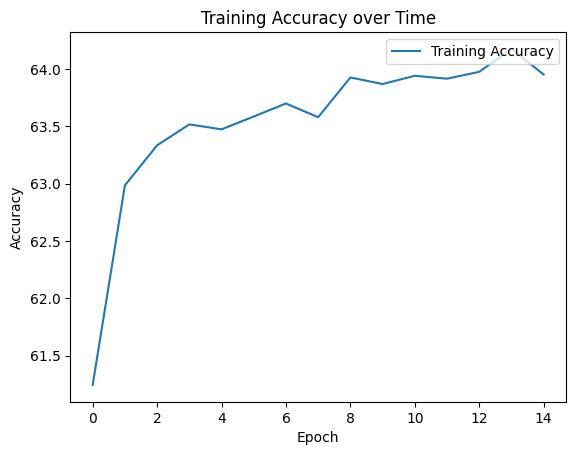

In [7]:
params_one = {
    'num_epochs': 10,
    'batch_size': 128,
    'learning_rate': 0.0002,
    'loss_fxn': 'MSELoss', # This will autocorrect to BCELoss for binary classification
    'optimizer': 'Adam',
}

params_two = {
    'num_epochs': 15,
    'batch_size': 128,
    'learning_rate': 0.01,
    'loss_fxn': 'MSELoss', # This will autocorrect to BCELoss for binary classification
    'optimizer': 'Adam',
}

mask_fp = "example_data/256_mfp_cs_mask1gl.csv"
mask = pd.read_csv(mask_fp, header=0, index_col=0)
mask = mask.T
mask = torch.tensor(mask.values, dtype=torch.float32)
print(f"Mask shape: {mask.shape}")
input_size = train_dataloader.dataset[0][0].shape[0]
hidden_layer_size = mask.shape[0]

pcnngl_model_one = PCNNGLModel(
    input_size = input_size,
    mask = mask,
    hidden_size = hidden_layer_size,
    num_epochs = params_one["num_epochs"],
    learning_rate = params_one["learning_rate"],
    loss_fxn = params_one["loss_fxn"],
    device = "cuda" if torch.cuda.is_available() else "cpu",
    binary_classification = True,
)

optimizer_one = optim.Adam(pcnngl_model_one.parameters(), lr=params_one["learning_rate"])
output_fp_one = 'example_output/pcnngl_one_'
    
train_cov_model(
    pcnngl_model_one,
    train_dataloader,
    optimizer_one,
    output_fp_one,
    loss_file=output_fp_one,
)

pcnngl_one_metrics = test_cov_model(pcnngl_model_one, tune_dataloader, output_fp_one)
print(pcnngl_one_metrics)

pcnngl_model_two = PCNNGLModel(
    input_size = input_size,
    mask = mask,
    hidden_size = hidden_layer_size,
    num_epochs = params_two["num_epochs"],
    learning_rate = params_two["learning_rate"],
    loss_fxn = params_two["loss_fxn"],
    device = "cuda" if torch.cuda.is_available() else "cpu",
    binary_classification = True,
)

optimizer_two = optim.Adam(pcnngl_model_two.parameters(), lr=params_two["learning_rate"])
output_fp_two = 'example_output/pcnngl_two_'

train_cov_model(
    pcnngl_model_two,
    train_dataloader,
    optimizer_two,
    output_fp_two,
    loss_file=output_fp_two,
)

pcnngl_two_metrics = test_cov_model(pcnngl_model_two, tune_dataloader, output_fp_two)
print(pcnngl_two_metrics)

pcnngl_best_model = pcnngl_model_one
pcnngl_best_metrics = test_cov_model(pcnngl_best_model, test_dataloader, 'example_output/pcnngl_best_')
print(pcnngl_best_metrics)

Run an example SYNDEEP

In [10]:
model_syndeep_one = SYNDEEPModelBC(input_size=num_features,)
model_syndeep_one.fit(train_dataloader, None, epochs=10)
one_syndeep_metrics = evaluate_syndeep_bc_model(model_syndeep_one, tune_dataloader)
print(one_syndeep_metrics)

model_syndeep_two = SYNDEEPModelBC(input_size=num_features,)
model_syndeep_two.fit(train_dataloader, None, epochs=30)
two_syndeep_metrics = evaluate_syndeep_bc_model(model_syndeep_two, tune_dataloader)
print(two_syndeep_metrics)

best_syndeep_model = model_syndeep_two
best_syndeep_metrics = evaluate_syndeep_bc_model(best_syndeep_model, test_dataloader)
print(best_syndeep_metrics)

Epoch [0/10], Loss: 0.7491, Accuracy: 52.02%
cpu
cpu
Y_test flattened shape: (18560,)
Y_pred flattened shape: (18560,)
[0.6490301724137931, 0.5737262521588946, 0.7240748709122203, 0.674492385786802, 0.6200419972001866, 0.3012485234066061, 0.6489005615355574, 0.2978777178963019]
Epoch [0/30], Loss: 0.7474, Accuracy: 52.35%
cpu
cpu
Y_test flattened shape: (18560,)
Y_pred flattened shape: (18560,)
[0.6683728448275862, 0.677461139896373, 0.659315834767642, 0.6646192947156624, 0.670978777997541, 0.3368284367796526, 0.6683884873320075, 0.33676577496631255]
cpu
cpu
Y_test flattened shape: (18561,)
Y_pred flattened shape: (18561,)
[0.6734550940143311, 0.6803465078505685, 0.6666309242976625, 0.668973594548552, 0.6746121221882214, 0.34699830691830064, 0.6734887160741155, 0.34694865525226704]


Run an example PCNNGL-SYNDEEP

Actually using BCE Loss
Model is training
Layer: input.weight, Size: torch.Size([722, 512])
Layer: input.bias, Size: torch.Size([722])
Layer: output.weight, Size: torch.Size([1, 32])
Layer: output.bias, Size: torch.Size([1])
Layer: batch_norms.0.weight, Size: torch.Size([512])
Layer: batch_norms.0.bias, Size: torch.Size([512])
Layer: batch_norms.0.running_mean, Size: torch.Size([512])
Layer: batch_norms.0.running_var, Size: torch.Size([512])
Layer: batch_norms.0.num_batches_tracked, Size: torch.Size([])
Layer: batch_norms.1.weight, Size: torch.Size([722])
Layer: batch_norms.1.bias, Size: torch.Size([722])
Layer: batch_norms.1.running_mean, Size: torch.Size([722])
Layer: batch_norms.1.running_var, Size: torch.Size([722])
Layer: batch_norms.1.num_batches_tracked, Size: torch.Size([])
Layer: batch_norms.2.weight, Size: torch.Size([128])
Layer: batch_norms.2.bias, Size: torch.Size([128])
Layer: batch_norms.2.running_mean, Size: torch.Size([128])
Layer: batch_norms.2.running_var, Size: torc

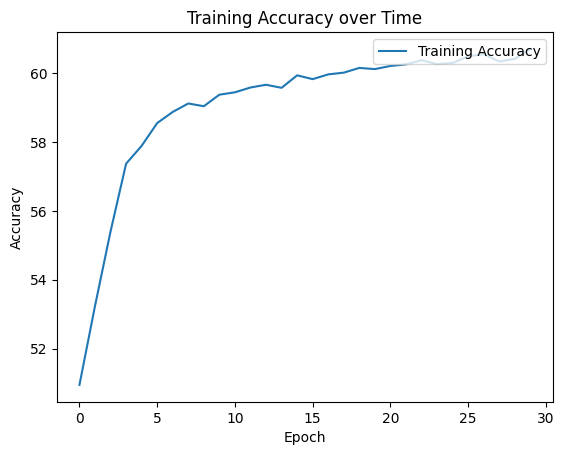

In [11]:
params_ps_one = {
    'hidden_sizes': [722, 128, 32],
    'num_epochs': 10,
    'batch_size': 128,
    'learning_rate': 2e-4,
    'loss_fxn': 'MSELoss', # This will autocorrect to BCELoss for binary classification
    'optimizer': 'Adam',
    'dropout_rate': 0.8,
}

params_ps_two = {
    'hidden_sizes': [722, 128, 32],
    'num_epochs': 30,
    'batch_size': 128,
    'learning_rate': 2e-4,
    'loss_fxn': 'MSELoss', # This will autocorrect to BCELoss for binary classification
    'optimizer': 'Adam',
    'dropout_rate': 0.8,
}

pcnngl_syndeep_model_one = PCNNGLSyndeepModel(
    input_size = input_size,
    mask = mask,
    hidden_sizes = params_ps_one['hidden_sizes'],
    num_epochs = params_ps_one['num_epochs'],
    learning_rate = params_ps_one["learning_rate"],
    loss_fxn = params_ps_one,
    device = "cuda" if torch.cuda.is_available() else "cpu",
    binary_classification = True,
    dropout_rate = params_ps_one["dropout_rate"],
)

optimizer_ps_one = optim.Adam(pcnngl_syndeep_model_one.parameters(), lr=params_ps_one["learning_rate"])
output_fp_ps_one = 'example_output/pcnnglsyndeep_one_'
    
train_cov_model(
    pcnngl_syndeep_model_one,
    train_dataloader,
    optimizer_ps_one,
    output_fp_ps_one,
    loss_file=output_fp_ps_one,
)

pcnngl_syndeep_one_metrics = test_cov_model(pcnngl_syndeep_model_one, tune_dataloader, output_fp_ps_one)
print(pcnngl_syndeep_one_metrics)

pcnngl_syndeep_model_two = PCNNGLSyndeepModel(
    input_size = input_size,
    mask = mask,
    hidden_sizes = params_ps_two['hidden_sizes'],
    num_epochs = params_ps_two['num_epochs'],
    learning_rate = params_ps_two["learning_rate"],
    loss_fxn = params_ps_two,
    device = "cuda" if torch.cuda.is_available() else "cpu",
    binary_classification = True,
    dropout_rate = params_ps_two["dropout_rate"],
)

optimizer_ps_two = optim.Adam(pcnngl_syndeep_model_two.parameters(), lr=params_ps_two["learning_rate"])
output_fp_ps_two = 'example_output/pcnnglsyndeep_two_'
    
train_cov_model(
    pcnngl_syndeep_model_two,
    train_dataloader,
    optimizer_ps_two,
    output_fp_ps_two,
    loss_file=output_fp_ps_two,
)

pcnngl_syndeep_two_metrics = test_cov_model(pcnngl_syndeep_model_two, tune_dataloader, output_fp_ps_two)
print(pcnngl_syndeep_two_metrics)

pcnngl_syndeep_best_model = pcnngl_syndeep_model_two
pcnngl_syndeep_best_metrics = test_cov_model(pcnngl_best_model, test_dataloader, 'example_output/pcnngl_syndeep_best_')
print(pcnngl_syndeep_best_metrics)